In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress


# definir archivos
working_read = "working_data.csv"
# Read the mouse data and the study results
working_df = pd.read_csv(working_read)


working_df.head()

,Unnamed: 0,State,Gas,MidGrade,Premium,Diesel,State Code,State Latitude,State Longitude,GDP per capita
0,0,Alaska,2.361,2.457,2.626,2.360,AK,64.200841,-149.493673,"73,205"
1,1,Alabama,1.747,2.057,2.390,2.268,AL,32.318231,-86.902298,"45,219"
2,2,Arkansas,1.744,2.010,2.302,2.109,AR,35.201050,-91.831833,"42,454"
3,3,Arizona,2.218,2.491,2.747,2.499,AZ,34.048928,-111.093731,"48,055"
4,4,California,2.961,3.132,3.248,3.275,CA,36.778261,-119.417932,"74,205"


In [48]:
working_df['GDP per capita']= working_df['GDP per capita'].str.replace(",","").astype(float)

In [49]:
working_df_woDC = working_df.loc[(working_df['State Code'] != "DC") ]
working_df.head()

,Unnamed: 0,State,Gas,MidGrade,Premium,Diesel,State Code,State Latitude,State Longitude,GDP per capita
0,0,Alaska,2.361,2.457,2.626,2.360,AK,64.200841,-149.493673,73205.0
1,1,Alabama,1.747,2.057,2.390,2.268,AL,32.318231,-86.902298,45219.0
2,2,Arkansas,1.744,2.010,2.302,2.109,AR,35.201050,-91.831833,42454.0
3,3,Arizona,2.218,2.491,2.747,2.499,AZ,34.048928,-111.093731,48055.0
4,4,California,2.961,3.132,3.248,3.275,CA,36.778261,-119.417932,74205.0


In [50]:
def working_plots (x,y,label,grid=False,reg=False,title='notitle'):
    plt.scatter(x,y,marker='o',edgecolors="black")
    plt.xlabel('GDP')
    plt.ylabel(label)
    plt.grid(grid)

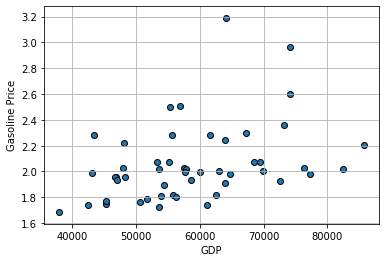

In [52]:
working_plots(working_df_woDC['GDP per capita'],working_df_woDC['Gas'],
              'Gasoline Price',True,False)

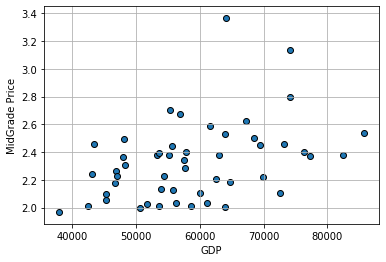

In [54]:
working_plots(working_df_woDC['GDP per capita'],working_df_woDC['MidGrade'],
              'MidGrade Price',True,False)

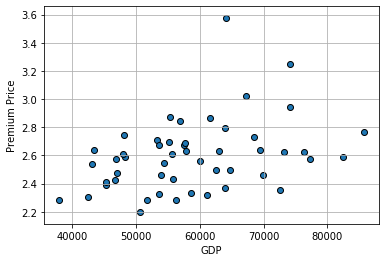

In [55]:
working_plots(working_df_woDC['GDP per capita'],working_df_woDC['Premium'],
              'Premium Price',True,False)

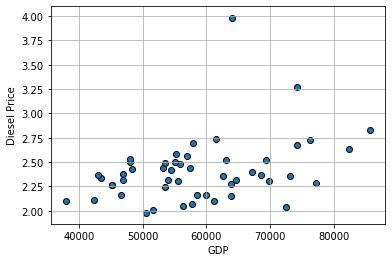

In [56]:
working_plots(working_df_woDC['GDP per capita'],working_df_woDC['Diesel'],
              'Diesel Price',True,False)

In [65]:
def gdp_reg (x,y,label,grid=False,reg=False):
    x_regr = x.min()
    y_regr = y.min()
    plt.scatter(x,y,marker='o')
    plt.grid(grid)
    plt.xlabel('GDP')
    plt.ylabel(label)
    if reg==True:
        (slope, intercept,rvalue,pvalue,stderr)= linregress(x,y)
        regress_values = x*slope + intercept
        line_eq = "y = "+str(round(slope,2)) +"x + " + str(round(intercept,2))
        plt.annotate(line_eq,(x_regr,y_regr),fontsize=15,color="red")
        plt.plot(x,regress_values,"r-")
        print(f"The R-square = {round(rvalue**2,2)}")

The R-square = 0.14


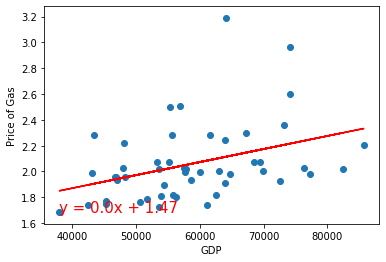

In [66]:
gdp_reg(working_df_woDC['GDP per capita'],working_df_woDC['Gas'],'Price of Gas',reg=True)

The R-square = 0.16


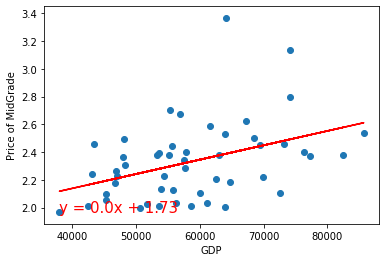

In [67]:
gdp_reg(working_df_woDC['GDP per capita'],working_df_woDC['MidGrade'],'Price of MidGrade',reg=True)

The R-square = 0.13


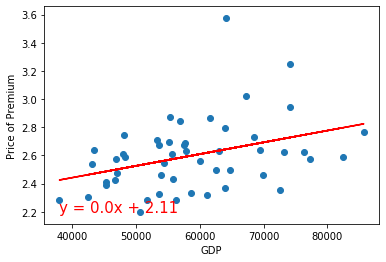

In [68]:
gdp_reg(working_df_woDC['GDP per capita'],working_df_woDC['Premium'],'Price of Premium',reg=True)

The R-square = 0.12


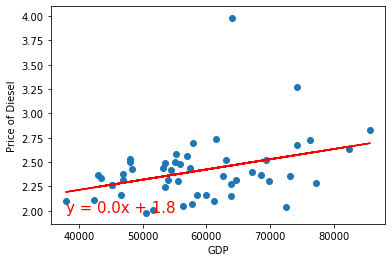

In [69]:
gdp_reg(working_df_woDC['GDP per capita'],working_df_woDC['Diesel'],'Price of Diesel',reg=True)

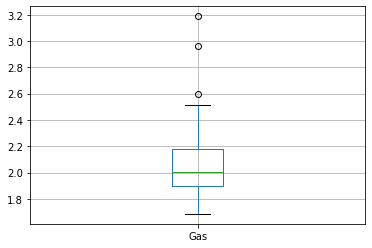

In [91]:


working_df_woDC.boxplot(column=["Gas"])
